<a href="https://colab.research.google.com/github/ferreyraru/coderhouseData/blob/main/Proyecto_Final_Ruben_Ferreyra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**

# **Data Science I : Fundamentos para la Ciencia de Datos**

# **Titulo: Analisis de Satisfacción en vuelos comerciales**

Fecha: 4/10/2024

Alumno: Ruben Ferreyra

Comisión: 61675

# Abstract / Dataset:

Se eligió un dataset llamado "Airline Passenger Satisfaction", que contiene información sobre los resultados de encuestas de satisfacción de pasajeros aéreos. Incluye tanto las respuestas a preguntas específicas sobre diversos servicios proporcionados durante el vuelo, como evaluación general del nivel de satisfacción con la aerolínea luego de un viaje.

El conjunto de datos está compuesto por más de 103.000 registros y 24 atributos. Estos datos permiten un análisis avanzado de clasificación sobre cada categoría, y su influencia en las respuestas positivas o negativas respecto a la satisfacción general del servicio. Se podrá analizar cuáles servicios tienen mayor influencia en la respuesta final de los clientes, y si las demoras en el arribo también afectan los resultados. Existen otras variables que también son de mucho valor para el análisis, que pueden dividirse entre datos que no están relacionados con la experiencia en el servicio recibido en el viaje, como el género y la edad, la categoría comprada o el tipo de cliente, y aquellas que si tienen que ver con la experiencia y el servicio que se recibió antes y durante el recorrido.

Finalmente, con esta información tan clara y detallada, se realizarán hipótesis y se analizarán los datos, para determinar como influyen en las respuestas generales, para confirmar cuáles de ellos pueden afectar más la satisfacción del cliente. Es necesario evaluar si esas variable podrían ser puestas en consideración para lograr mejorarlas a través de una inversión en el mediano plazo, enfocándose en aquellas categorías en las que se pueda confirmar que más afecten la satisfacción de los pasajeros, y que no son variables no relacionadas con la experiencia, como por ejemplo la edad de los pasajeros, donde la aerolínea no puede tener una influencia clara.

# Usuario final del proyecto

El usuario final de este proyecto es una compañía area de nivel mundial, que ha recopilado la información para poder realizar los análisis solicitados como objeto de este proyecto.

El dataset fue obtenido del siguiente link provisto por Coderhouse:

https://drive.google.com/drive/folders/1mvGmYlb6voKr7U5OMURxnuBvsNvAntpC

Diccionario de los datos:

Gender: Género de los pasajeros (Femenino, Masculino)

Customer Type: El tipo de cliente (Cliente Loyal, cliente Disloyal)

Age: La edad real de los pasajeros

Type of Travel: Propósito del vuelo de los pasajeros (Viaje
Personal, Viaje de Negocios)

Class: Clase de viaje en el avión de los pasajeros (Negocios, Económica, Económica Plus)

Flight distance: La distancia del vuelo de este viaje

Inflight wifi service: Nivel de satisfacción del servicio de wifi a bordo (0: No Aplicable; 1-5)

Departure/Arrival time convenient: Nivel de satisfacción con la conveniencia del horario de salida/llegada

Ease of Online booking: Nivel de satisfacción con la reserva en línea

Gate location: Nivel de satisfacción con la ubicación de la puerta

Food and drink: Nivel de satisfacción con la comida y bebida

Online boarding: Nivel de satisfacción con el embarque en línea

Seat comfort: Nivel de satisfacción con la comodidad del asiento

Inflight entertainment: Nivel de satisfacción con el entretenimiento a bordo

On-board service: Nivel de satisfacción con el servicio a bordo

Leg room service: Nivel de satisfacción con el servicio de espacio
para las piernas

Baggage handling: Nivel de satisfacción con el manejo de equipaje

Check-in service: Nivel de satisfacción con el servicio de check-in

Inflight service: Nivel de satisfacción con el servicio a bordo

Cleanliness: Nivel de satisfacción con la limpieza

Departure Delay in Minutes: Minutos de retraso en la salida

Arrival Delay in Minutes: Minutos de retraso en la llegada

Satisfaction: Nivel de satisfacción con la aerolínea (Satisfecho o "neutral o insatisfecho")

Objetivo:

*   Realizar análisis exploratorios de los datos
*   Establecer 2 hipótesis, y desarrollar análisis y gráficos que permitan confirmar o rechazar lo propuesto.
*   Identificar variables más influyentes en cuanto a la respuesta de satisfacción de los clientes
*   Elegir un algoritmo para entrenar con los datos elegidos.
*   Cálculo de métricas básicas para validar el modelo.
*   Generar conclusiones con base en los resultados obtenidos, para ser informados a la compañía aerea.

# Importación de todas las librerías necesarias para el reporte

In [ ]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # Importa la clase SimpleImputer para trabajar con los nulos
import sys
import joblib

#instalando mlxtend
!pip install mlxtend

from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report # Import necessary functions


In [ ]:
#Carga del dataset
file_path = "https://raw.githubusercontent.com/ferreyraru/coderhouseData/refs/heads/main/Airline%20Passenger%20Satisfaction.csv"
travelsat = pd.read_csv(file_path)


# **EDA analisis exploratorio de datos e hipótesis**

Se comienza analizando la base de datos:

In [ ]:
#Vista general de los datos
travelsat.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
travelsat.shape


(103904, 25)

In [ ]:
travelsat.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
travelsat.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
travelsat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

El dataset contiene 25 columnas, de las cuales 5 no son numéricas. No todas las columnas están relacionadas con servicios que la empresa puede brindar o mejorar. Esto será parte del análisis, tomando en cuenta el efecto que esas columnas tienen en la respuesta, pero también enfocando los resultados particulamente en aquellas variables que pueden ser recomendadas para mejora.

**Datos nulos**

Se verificación datos nulos en todas las columnas

In [ ]:
contar_datos_nulos = travelsat.isnull().sum()

In [ ]:
contar_datos_nulos

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Se encontraron valores nulos en la columna "Arrival Delay in Minutes" que deben ser reemplazados

In [ ]:
# Se decide reemplazar lo valores nulos en la columna Arrival Delay por la mediana:
valores = travelsat.values #numpy array con los valores
imputador = SimpleImputer(missing_values=np.nan, strategy='median') #definir el imputador
# transformar solo la columna que tiene valores nulos
travelsat['Arrival Delay in Minutes'] = imputador.fit_transform(travelsat[['Arrival Delay in Minutes']])



In [ ]:
#confirmación de que no haya datos nulos luego del reemplazo
contar_datos_nulos = travelsat.isnull().sum()
contar_datos_nulos

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Ya no quedan datos nulos en el dataset

#Primera hipótesis:

**Analisis de variables no directamente relacionadas con el servicio**

¿Hay una gran diferencia en la satisfacción de los clientes según el tipo de cliente y la edad?

Hipotesis: Se espera que estas 2 variables no dependientes del vuelo en particular tengan un impacto importante en la satisfacción o no de los clientes, más allá de las otras categorías que si están relacionadas con la experiencia del vuelo en el que se realizó la encuesta.

([<matplotlib.patches.Wedge at 0x7db67ee7c4f0>,
 [Text(-1.0759618925804026, -0.22870506272227162, 'neutral or dissatisfied'),
  Text(1.0759618925804026, 0.22870506272227195, 'satisfied')],
 [Text(-0.5868883050438559, -0.12474821603032996, '56.7%'),
  Text(0.5868883050438559, 0.12474821603033014, '43.3%')])

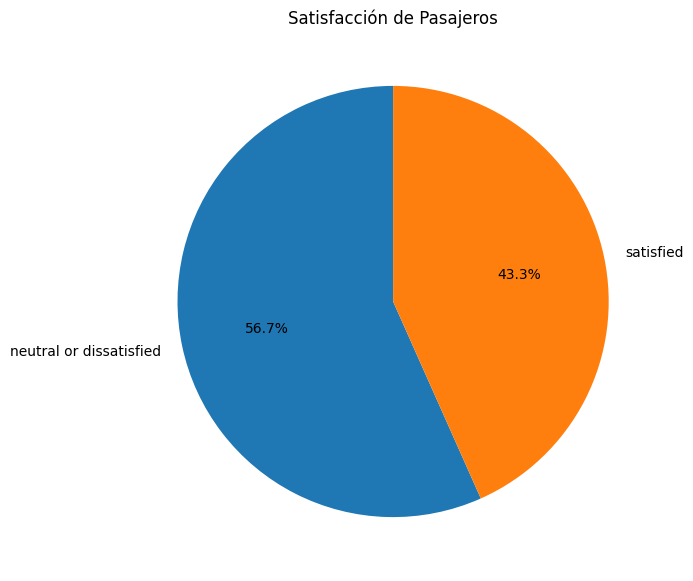

In [ ]:
# Graficos utilizando la librería Matplotlib
#Se analiza la satisfacción o no de los clientes en general para poder confirmar si hay variación según las categorias analizadas:
# Contar la cantidad de clientes satisfechos:
frecuencia_sat = travelsat['satisfaction'].value_counts()

# Crear un gráfico de torta
fig,ax = plt.subplots(figsize =(10, 7))
plt.title('Satisfacción de Pasajeros')
ax.pie(frecuencia_sat, labels = frecuencia_sat.index, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x7db67f12d930>,
 [Text(-1.0972018701321677, -0.07840954137395408, 'neutral or dissatisfied'),
  Text(1.097201862790932, 0.07840964410140698, 'satisfied')],
 [Text(-0.5984737473448187, -0.042768840749429486, '52.3%'),
  Text(0.5984737433405083, 0.04276889678258562, '47.7%')])

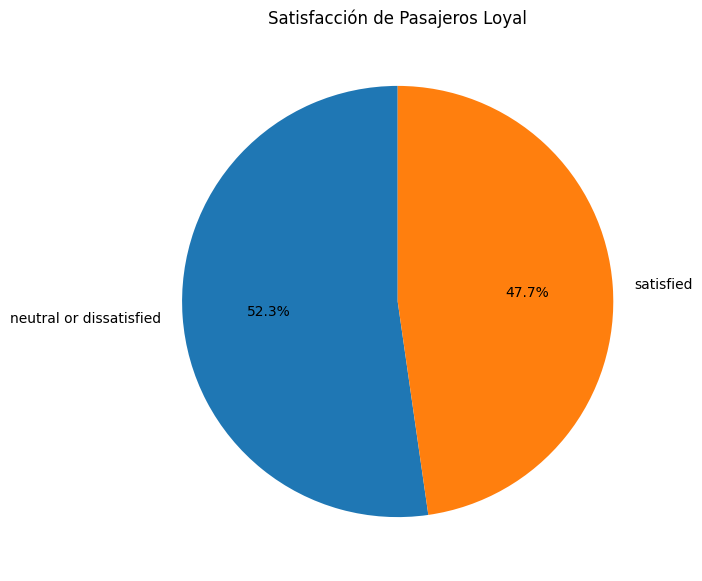

In [ ]:
#Filtrando por cliente loyal y analizar variación
travelsat_filtrado = travelsat[travelsat['Customer Type'] == 'Loyal Customer']
frecuencia_travelsat_filtrado = travelsat_filtrado['satisfaction'].value_counts()

# Crear un gráfico de torta
fig,ax = plt.subplots(figsize =(10, 7))
plt.title('Satisfacción de Pasajeros Loyal')
ax.pie(frecuencia_travelsat_filtrado, labels = frecuencia_travelsat_filtrado.index, autopct='%1.1f%%', startangle=90)


Al analizar la repuesta de satisfacción de los clientes "loyal", se ve una pequeña mejora en satisfacción (de alrededor del 4%).

([<matplotlib.patches.Wedge at 0x7db67b95bd90>,
 [Text(-0.7445408556373103, -0.8097276790914723, 'neutral or dissatisfied'),
  Text(0.7445409314494841, 0.8097276093825224, 'satisfied')],
 [Text(-0.4061131939839874, -0.441669643140803, '76.3%'),
  Text(0.4061132353360822, 0.4416696051177395, '23.7%')])

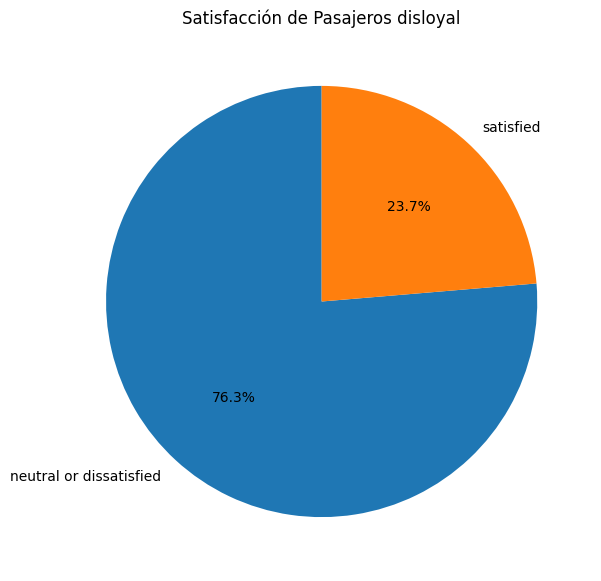

In [ ]:
#Filtrando por cliente loyal y analizar variación
travelsat_filtrado = travelsat[travelsat['Customer Type'] == 'disloyal Customer']
frecuencia_travelsat_filtrado = travelsat_filtrado['satisfaction'].value_counts()

# Crear un gráfico de torta
fig,ax = plt.subplots(figsize =(10, 7))
plt.title('Satisfacción de Pasajeros disloyal')
ax.pie(frecuencia_travelsat_filtrado, labels = frecuencia_travelsat_filtrado.index, autopct='%1.1f%%', startangle=90)

Pudimos confirmar la hipótesis al indicar que el tipo de cliente influye en la satisfacción del pasajero.
Los clientes "disloyal" responden a la encuesta de una forma neutral o negativa en un 24% más que los clientes loyal o un 20% más que las respuestas en general. Se realizarán recomendaciones sobre esta área, y cómo puede afectar las respuestas.

**Analisis por edad**

A continuación, para el analisis de como afecta la edad a las respuestas de los clientes, utilizaremos un histograma.


<Axes: xlabel='Age', ylabel='Count'>

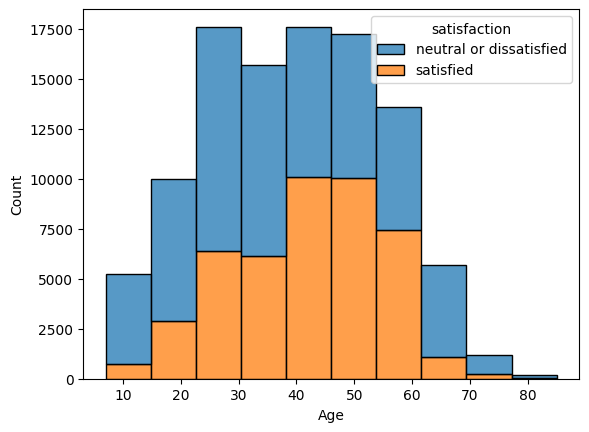

In [ ]:
# Grafico utilizando la librería Seaborn

sns.histplot(data=travelsat, x="Age", hue="satisfaction", multiple="stack", bins=10)

Claramente este gráfico nos muestra que hay variación en la satisfacción de los clientes según la edad, tal como lo indicaba la hipótesis. Cuando viajan niños y jóvenes, y para pasajeros de mayor edad (mayores a 60 años), la satisfacción es menor. En cambio en las edades de aproximadamente 40 a 60 años, la satisfacción positiva es mucho mayor que las respuestas en general.

A diferencia de la variable anterior, sobre la edad de los pasajeros no se puede realizar una selección o campaña, pero se podría en el futuro realizar un análisis más detallado de porque la diferencia de satisfacción en esas edades en particular.   

#Segunda hipótesis:

**Analisis de variables relacionadas con el servicio en el vuelo**

¿Hay una gran diferencia en la satisfacción de los clientes si el vuelo se retrasó? ¿Hay servicios en el vuelo que afectan más que otros la respuesta final?

Hipotesis: Se espera que en aquellos vuelos que la demora fue mayor, la experiencia haya sido negativa para los usuarios. Además, se espera que servicios relacionados con la comodidad en el vuelo también tengan un impacto mayor que otros servicios que son solo agregados o adicionales.

satisfaction     neutral or dissatisfied  satisfied
categoria_delay                                    
sin demora                         30844      27625
1-30 min                           18604      12169
31-60 min                           4721       2614
61-90 min                           1983       1091
91-120 min                          1067        569
>120 min                            1660        957
satisfaction     neutral or dissatisfied  satisfied
categoria_delay                                    
sin demora                     52.752741  47.247259
1-30 min                       60.455594  39.544406
31-60 min                      64.362645  35.637355
61-90 min                      64.508783  35.491217
91-120 min                     65.220049  34.779951
>120 min                       63.431410  36.568590


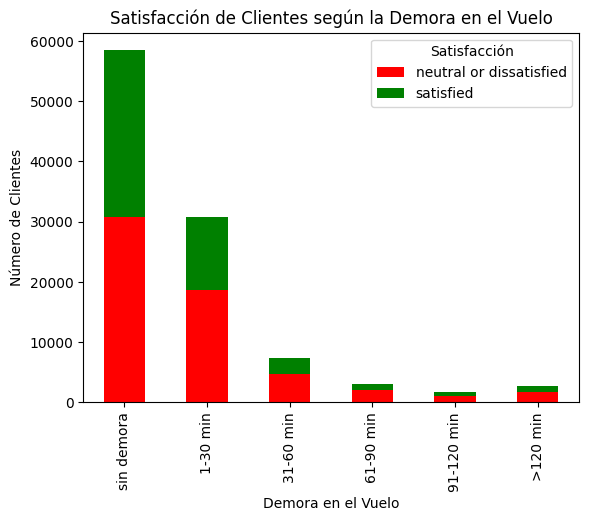

In [ ]:
# Se analizara cuanto varían las respuestas del cliente a medida que las demoras son mayores

#Categorizar la demora
travelsat_delay=travelsat.copy()
travelsat_delay['categoria_delay'] = pd.cut(travelsat['Arrival Delay in Minutes'], bins=[-float('inf'),0, 30, 60, 90, 120, float('inf')], labels=['sin demora','1-30 min', '31-60 min', '61-90 min', '91-120 min', '>120 min'])

# Se cuenta la cantidad de veces que ocurre por categoría
contingency_table = pd.crosstab(travelsat_delay['categoria_delay'], travelsat_delay['satisfaction'])
# Se calculan los porcentajes de la tabla de contingencia
percentage_table = contingency_table.div(contingency_table.sum(1), axis=0) * 100
print(contingency_table)
print(percentage_table)

# Crear el gráfico de barras
contingency_table.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Satisfacción de Clientes según la Demora en el Vuelo')
plt.xlabel('Demora en el Vuelo')
plt.ylabel('Número de Clientes')
plt.legend(title='Satisfacción')
plt.show()

Gracias a este gráfico podemos encontrar una diferencia en el porcentaje de clientes satisfechos de aquellos vuelos que no tuvieron demora, con los que tuvieron demoras, lo que parcialmente comprueba la hipótesis. Sin embargo, se esperaba mayor nivel de clientes insatisfechos en los vuelos a medida que la demora era mayor. Esto no se pudo comprobar, ya que a partir de los 30 minutos de demora, los porcentajes se mantienen muy similares, y en el gráfico no se ve una diferencia entre cada categoría, inclusive en los vuelos que tuvieron más de 2 horas de demora.

Es importante destacar que la cantidad de vuelos con demora alta no es muy baja, y no es significativa para el resto del analisis de este proyecto. Incluso la mediana (0) de esta variable, que se puede ver en la descripción (describe) de la tabla, indica que más de la mitad de los vuelos no tienen demora.

**Analisis de variables que pueden afectar la satisfacción al cliente en mayor medida que otras**

Vamos a analizar cómo afecta la categoría comodidad del asiento a la satisfacción del cliente. ¿Se puede ver un aumento en los clientes satisfechos a medida que se indica que la calidad del asiento es buena?


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

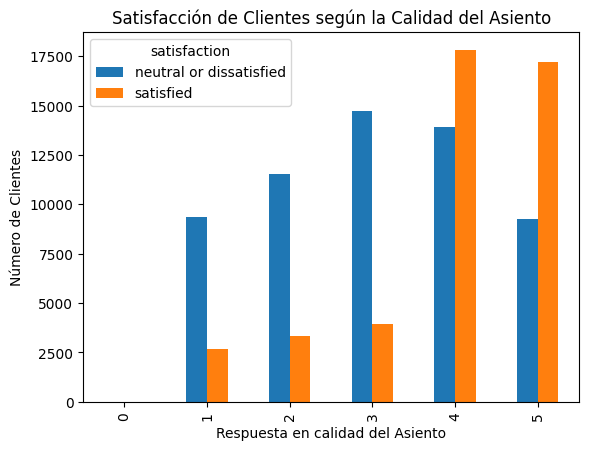

In [ ]:
counts = travelsat.groupby(['Seat comfort', 'satisfaction']).size().unstack()
counts.plot(kind='bar', stacked=False)
plt.title('Satisfacción de Clientes según la Calidad del Asiento')
plt.xlabel('Respuesta en calidad del Asiento')
plt.ylabel('Número de Clientes')
plt

Vemos que la calidad del asiento afecta en gran medida a la satisfacción del cliente.  Sin embargo, es posible que haya otra variable que tengan el mismo efecto. Haremos un gráfico similar para alimentos y bebidas durante el vuelo

Text(0, 0.5, 'Número de Clientes')

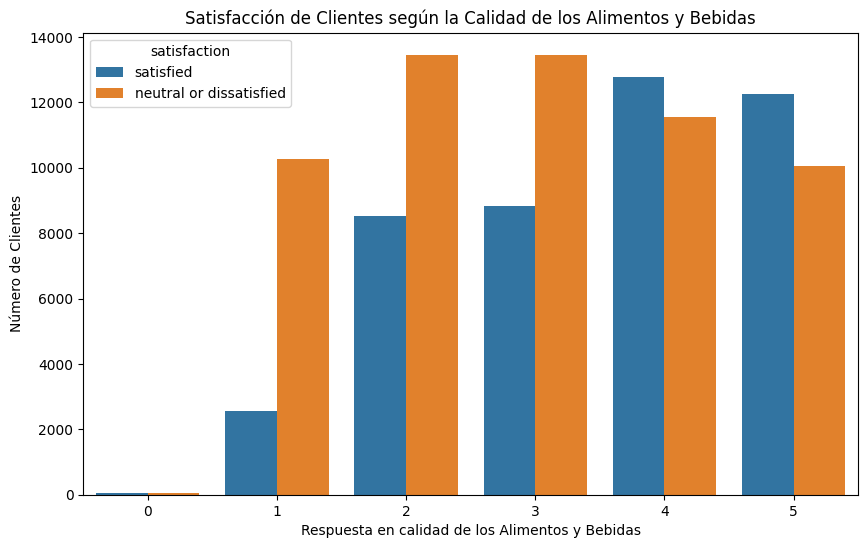

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Food and drink', hue='satisfaction', data=travelsat)
plt.title('Satisfacción de Clientes según la Calidad de los Alimentos y Bebidas')
plt.xlabel('Respuesta en calidad de los Alimentos y Bebidas')
plt.ylabel('Número de Clientes')


Si bien las respuestas a la calidad de los alimentos y bebidas afecta la respuesta a la satisfacción, su dependencia es mucho menos marcada que lo que sucede con la calidad de los asientos. Esto puede llevar a entender que la hipótesis es correcta, la comodidad durante el vuelo tiene un efecto más fuerte en la respuesta general que otras variables que solo son consideradas como servicios adicionales durante un vuelo.

En la segunda parte del proyecto, con la elección de variables y algoritmos de predicción, podremos confirmar en una mejor manera cuáles son las áreas que pueden afectar más la satisfacción al cliente

# Segunda parte del proyecto

**Selección de variables por relación con el proyecto**

Para poder realizar un buen análisis de correlación de variables(x), se seleccionarán solamente las columnas relevantes, que tienen un efecto muy grande en la satisfacción del cliente y que están muy relacionadas con servicios que depende de la empresa aerea, de los cuales podríamos hacer recomendaciones de mejora para obtener un mayor porcentaje de satisfacción al cliente.

In [ ]:
travelsat.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
#Se quitan las columnas que no aportan información
travelsat=travelsat.drop(columns=['Unnamed: 0','id'])

#Se mantienen las columnas relevantes o relacionadas con servicios que pueden ser mejorados
travelsat_filtrado = travelsat[['Customer Type','Inflight wifi service','Ease of Online booking','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction']]
#Las columnas Gender, Age, Type of Travel, Class y las relacionadas con demoras no serán incluidas en esta parte del análisis.

**Transformación de variables**

Queremos codificar las variables no numéricas, para poder analizar correlación y efecto sobre nuestra variable dependiente Y (Satisfacción).

In [ ]:
# Convertimos la variable de Satisfacción
#"neutral or dissatisfied" = 0
#"satisfied" = 1

travelsat_filtrado["satisfaction"] = travelsat["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied":1})

# Convertimos la variable Customer Type
#"disloyal Customer" = 0
#"Loyal Customer" = 1
travelsat_filtrado["Customer Type"] = travelsat["Customer Type"].replace({"disloyal Customer": 0, "Loyal Customer":1})

<ipython-input-21-5935f7f4a7bb>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  travelsat_filtrado["satisfaction"] = travelsat["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied":1})
<ipython-input-21-5935f7f4a7bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travelsat_filtrado["satisfaction"] = travelsat["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied":1})
<ipython-input-21-5935f7f4a7bb>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

# **Correlación de variables**

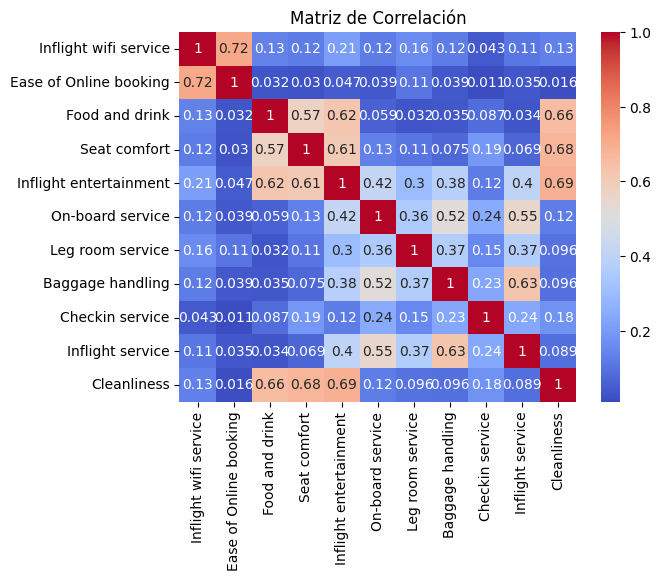

In [ ]:
travelsat_2 = travelsat_filtrado                                                                                                [['Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]

correlation_matrix = travelsat_2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', )
plt.title('Matriz de Correlación')

plt.show()

Se encontró correlación (no fuerte) entre algunas de las variables, que debemos analizar para decidir cuán no incluiremos en el modelo.  Se esperaba que este tipo de correlación pueda existir, ya que los clientes pueden responder de manera similar en cuanto a su percepción del servicio en areas que tienen alguna relación entre ellas.

*   La primera correlaciónes que analizaremos es la que existe entre 4 variables: Limpieza, Comidas y bebidas, Comodidad del Asiento y entretenimiento en vuelo. Para eliminar esa correlación, solo podemos dejar una de esas variables.

*   Existe una correlación entre el manejo del equipaje y el servicio en el vuelo.

*   Por último, hay correlación entre el servicio de wifi en el vuelo y cuan fácil fue realizar la reserva online.

Es muy bueno notar que la correlación fue baja para el resto de los casos, lo que permitirá que se puedan considerar la mayoría las áreas que tienen un efecto mayor en la satisfacción (lo que se analizará a continuación), sin temor a que un tipo de relación de estas variables pueda afectar los resultados.

In [ ]:
#Se eliminan las variables con correlación para asegurar el buen funcionamiento del modelo
travelsat_filtrado=travelsat_filtrado.drop(columns=['Cleanliness','Food and drink','Seat comfort','Baggage handling','Ease of Online booking'])

# **Machine Learning**

# Desarrollo del modelo de predicción

# Selección de variables más influyentes en la satisfacción

In [ ]:
#Se divide el dataset en Train: x y Test: y
x = travelsat_filtrado.drop('satisfaction', axis=1)
y = travelsat_filtrado['satisfaction']

Se utiliza Forward selection para poder encontrar las variables independiente más importantes para la variable y - dependiente


In [ ]:
#Se reduce la cantidad de datos solo para realizar el Forward selection
x2=x.head(25000)
y2=y.head(25000)

In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(RandomForestClassifier(n_estimators=100, n_jobs=-1),
          k_features=5,#cantidad de variables deseadas
          forward=True,
          floating=False,
          verbose=2,
          scoring = 'accuracy',#score para ver importancia de variables
          cv = 3)

In [ ]:
sfs.fit(x2, y2)
sfs.k_feature_names_


[2024-11-12 17:10:18] Features: 1/5 -- score: 0.7902402585184282
[2024-11-12 17:10:29] Features: 2/5 -- score: 0.8230001626270954
[2024-11-12 17:10:40] Features: 3/5 -- score: 0.8733600987908007
[2024-11-12 17:10:52] Features: 4/5 -- score: 0.8880799724429581
[2024-11-12 17:11:02] Features: 5/5 -- score: 0.8936799180630532

('Inflight wifi service',
 'Online boarding',
 'Inflight entertainment',
 'Leg room service',
 'Inflight service')

In [ ]:
#Se obtienen las variables seleccionadas y se las pasa a una lista
Variables_seleccionadas =list(sfs.k_feature_names_)
print(Variables_seleccionadas)

['Inflight wifi service', 'Online boarding', 'Inflight entertainment', 'Leg room service', 'Inflight service']


**Se identifican las variables Inflight wifi service, Online boarding, Inflight entertainment y Leg room service como las variables más influyentes para la respuesta de satisfacción de los clientes**

In [ ]:
#Para realizar el algoritmo, solo se dejan estas variables seleccionadas como las más importantes para el modelo
X = travelsat_filtrado[Variables_seleccionadas]
X.head()

,Inflight wifi service,Online boarding,Inflight entertainment,Leg room service,Inflight service
0,3,3,5,3,5
1,3,3,1,5,4
2,2,5,5,3,4
3,2,2,2,5,4
4,3,5,3,4,3


Se debe realizara un algoritmo de clasificación, debido a tener una variable objeto con dos opciones (Satisfecho o no).

**Se elige un algoritmo de arbol de decisión como el más adecuado para este modelo**

In [ ]:
#Se dividen los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(72732, 5)

In [ ]:
X_test.shape

(31172, 5)

In [ ]:
#Traer el algoritmo
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=42)

model = clf.fit(X_train, y_train)
#entrenando los datos
y_predicho=clf.predict(X_test)
y_predicho


array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_test


,satisfaction
80638,0
43398,0
32751,0
33571,0
71287,0
...,...
5007,1
4869,1
93969,0
78320,1


# Cálculo de métricas - validación del modelo

In [ ]:
accuracy_score(y_test, y_predicho)

0.899846015655075

**Se obtiene un muy buen nivel de predicción, mayor al 0.89, tomando en cuenta el nivel de acierto, sin diferenciar si fueron positivos o negativos.**

<Figure size 1000x600 with 0 Axes>

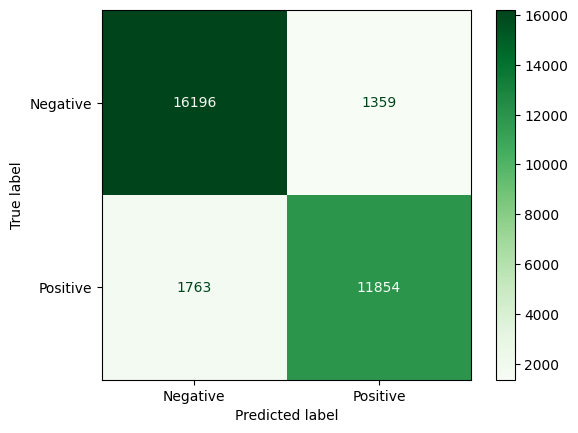

In [ ]:
plt.figure(figsize=(10, 6))
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Negative', 'Positive'], cmap='Greens')
plt.show()

La matriz de confusión nos indica que tenemos muy buenos valores de acierto tanto en positivos reales como en negativos reales.

Verdaderos positivos:11850 - Verdaderos negativos: 15987 - Falsos positivos: 1568 - Falsos negativos: 1767

Veremos los porcentajes exactos tanto en la precisión como en la sensibilidad, y por último en el reporte de clasificación:

In [ ]:
precision_positiva = precision_score(y_test, y_predicho, pos_label=1)
precision_negativa = precision_score(y_test, y_predicho, pos_label=0)
precision_positiva, precision_negativa

(0.8971467494134564, 0.9018319505540398)

In [ ]:
recall_sensibilidad = recall_score(y_test, y_predicho, pos_label=1)
recall_especificidad= recall_score(y_test, y_predicho, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.8705294852023207, 0.9225861577898035)

In [ ]:
f1_positivo = f1_score(y_test, y_predicho, pos_label=1)
f1_negativo = f1_score(y_test, y_predicho, pos_label=0)
f1_positivo, f1_negativo

(0.8836377189713008, 0.9120910063636876)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_predicho))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     17555
           1       0.90      0.87      0.88     13617

    accuracy                           0.90     31172
   macro avg       0.90      0.90      0.90     31172
weighted avg       0.90      0.90      0.90     31172



 Hemos obtenido una muy buen predicción tanto en Precisión como en Sensibilidad (Recall). Tenemos un bajo porcentaje de falsos positivos y falsos negativos. Hay una pequeña diferencia que permite indicar que el modelo es mejor para encontrar los negativos (neutral o no satisfecho en este caso). Sin embargo, el algoritmo ha obtenido excelentes resultados, permitiendo confirmar que estas 4 variables tienen un gran efecto en el modelo.



# **Conclusiones**


*   Se pudo realizar un modelo predictivo que permite confirmar cuánto afectan a la satisfacción las 4 variables más importantes relacionadas con el servicio de la empresa.

# Analisis de variables no directamente relacionadas con el servicio:
*   Las variables no relacionadas con el servicio tienen una influencia muy grande en la satisfacción del cliente.
*   Se podría hacer análisis adicionales con valores específicos para conocer su influencia, por ejemplo, análisis solo con pasajeros de edad menores o mayores, para intentar entender el motivo de que sus respuestas sean mayormente negativas.
*   De las variables no relacionadas con el servicio, una de las más influyentes es el tipo de cliente, si son clientes loyal o no. Los clientes loyal tienen mayores respuestas positivas sobre la satisfacción. Es una variable en la cual la empresa puede realizar una inversión o un intento de mejora.  **Se recomienda realizar campañas para que mayor cantidad de clientes que toman los vuelos puedan ser loyal.**

# Analisis de variables directamente relacionadas con el servicio:
*   Los vuelos sin demora tienen una mejor respuesta de satisfacción que aquellos que si tuvieron algunos minutos de demora. Sin embargo, el tiempo demora en los vuelos no afecta en tan gran medida la satisfacción del cliente, y en muchos casos se produce por problemas ajenos a la empresa. **La recomendación para la empresa es seguir comprometida a que, siempre que sea posible, los vuelos lleguen en tiempo.**
*   Las variables que más influyen en la satisfacción al cliente son variables relacionadas con la comodidad y la experiencia en el vuelo. Gracias al modelo desarrollado pudimos comprobar que las cuatro variables más importantes son:  Servicio de wifi en el vuelo, proceso de boarding online, entretenimientos en vuelo y el espacio para las piernas durante el vuelo.  

**Se recomienda a la empresa poder trabajar y realizar inversiones en estas áreas, particularmente las que tienen que ver con comodidad y atención del pasajero durante el vuelo. El espacio para la piernas, o incluso la comodidad del asiento afectan la satisfacción del cliente. También áreas como entretenimiento a bordo, y wifi en el vuelo pueden mejorar mucho los resultados de la encuenta. Por último, realizar que el proceso de boarding online sea más eficiente, y ayude a los pasajeros a abordar el vuelo de manera más rápida también tiene un efecto positivo en los resultados de la encuesta.**